## 1st week mission: Decision Tree Model

* The purpose of the mission
    * Understanding the fundamental process of running a machine learning model (Fitting => Prediction => Evaluation)
    * Practicing to use Scikit-learn API
    * Splitting the dataset into training and test ones for fitting
    * How to evaluate the accuracy of a certain model after fitting and prediction
    * Using DecisionTree which is one of fundamental method based boosting algorithm 
    
* Introduction of the mission dataset
    * This kaggle dataset( https://www.kaggle.com/blastchar/telco-customer-churn ) contains Telco customer churn provided by IBM. The dataset can be used to predict requried actions to keep customers, and also be helpful for developing a customer loyalty program.
    
    * The dataset consists of the following information:
        - Customers who left within the last month – the column is called Churn
        - Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device 
          protection, tech support, and streaming TV and movies
        - Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly 
          charges, and total charges
        - Demographic info about customers – gender, age range, and if they have partners and dependents


* Real-world problems that can be addressed with this mission:
    * Churn Prediction Modeling: As the most common use case, it involves building a model to predict the likelihood of customer 
      churn. These models analyze past data and behavior patterns of customers to predict who is more likely to churn.

    * Customer Segmentation: Segmenting customers into various groups to understand why certain groups may have a higher churn rate. 
      This allows for the development of targeted marketing strategies or providing more customized services to specific customer 
      groups.

    * Cause Analysis: Using machine learning models to identify the main causes of customer churn. For example, analyzing how various 
      factors such as service quality, pricing, and customer service experiences influence customer churn. Determine the importance 
      of features and identify which factors are key features of churn.

    * Recommendation System Improvement: Increase customer satisfaction and reduce churn rates by recommending personalized services 
      or products to customers at risk of churning.

    * Customer Retention Strategy Development: Use churn prediction models to identify high-risk customers and target them with 
      special promotions, improved customer service, and customized communication strategies to reduce churn rates.

    * Policy and Service Improvement: Improve business policies, products, and services based on insights derived from the model to 
      enhance the overall customer experience.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset 
df = pd.read_csv("data/Telco_Customer_Churn.csv", index_col="customerID")
df.shape

(7043, 20)

In [3]:
# Show the first two rows in the data frame 
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [4]:
# Check the data types in each column 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [5]:
# Calculate the sum of missing values column by column 
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# Calculate the total sum of the data frame 
df.isnull().sum().sum()

0

In [7]:
# Convert strings into numerical data
# If there is any whitespace character at both sides of each word, eliminate it by using str.strip() 
# Convert the whitespace character into NaN by suing .replace("", np.nan)
# Convert the TotalCharges column into numerical one by using .astype(float)
df["TotalCharges"] = df["TotalCharges"].str.strip().replace("", np.nan).astype(float)

In [8]:
df["TotalCharges"].head(1)

customerID
7590-VHVEG    29.85
Name: TotalCharges, dtype: float64

In [9]:
# For binary variable encoding, we look for variables that can be encoded into binary values, as they have two categorical values.
nuniq = df.nunique()
bi_cols = nuniq[nuniq == 2].index
bi_cols

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'Churn'],
      dtype='object')

In [10]:
df[bi_cols]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn
customerID,,,,,,,
7590-VHVEG,Female,0,Yes,No,No,Yes,No
5575-GNVDE,Male,0,No,No,Yes,No,No
3668-QPYBK,Male,0,No,No,Yes,Yes,Yes
7795-CFOCW,Male,0,No,No,No,No,No
9237-HQITU,Female,0,No,No,Yes,Yes,Yes
...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,Yes,Yes,No
2234-XADUH,Female,0,Yes,Yes,Yes,Yes,No
4801-JZAZL,Female,0,Yes,Yes,No,Yes,No


In [11]:
# Encoding for binary variables.
df["gender_encode"] = (df["gender"] == "Male").astype(int)
df["Partner_encode"] = (df["Partner"] == "Yes").astype(int)
df["Dependents_encode"] = (df["Dependents"] == "Yes").astype(int)
df["PhoneService_encode"] = (df["PhoneService"] == "Yes").astype(int)
df["PaperlessBilling_encode"] = (df["PaperlessBilling"] == "Yes").astype(int)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender_encode,Partner_encode,Dependents_encode,PhoneService_encode,PaperlessBilling_encode
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Yes,Electronic check,29.85,29.85,No,0,1,0,0,1
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,Mailed check,56.95,1889.50,No,1,0,0,1,0
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Yes,Mailed check,53.85,108.15,Yes,1,0,0,1,1
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,Bank transfer (automatic),42.30,1840.75,No,1,0,0,0,0
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Yes,Electronic check,70.70,151.65,Yes,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Mailed check,84.80,1990.50,No,1,1,1,1,1
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,Yes,Credit card (automatic),103.20,7362.90,No,0,1,1,1,1
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,Yes,Electronic check,29.60,346.45,No,0,1,1,0,1


In [12]:
# Count the number of each class in the label.
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [13]:
# Show the above result in proportion. 
df["Churn"].value_counts(1)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

<Axes: xlabel='Churn', ylabel='count'>

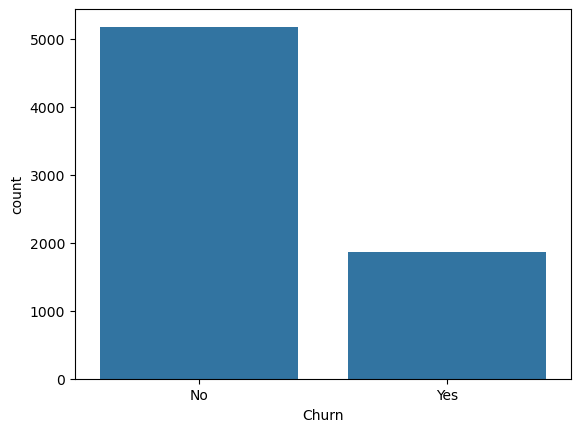

In [14]:
sns.countplot(data=df, x="Churn")


## 1) - Splitting the dataset into train and test ones 

* X_train : Contains the columns with feature_names defeature_names in the train data

* X_test : Contains the columns with feature_names defeature_names in the test data

* y_train : Contains the columns with the label name defeature_names in the train data
    
* y_test : Contains the columns with the label name defeature_names in the test data
    
    
* Split the dataset with the ratio of 8:2 between the train and the test data. 


| customerID   |   SeniorCitizen |   tenure |   MonthlyCharges |   TotalCharges |   gender_encode |   Partner_encode |   Dependents_encode |   PhoneService_encode |   PaperlessBilling_encode |
|:-------------|----------------:|---------:|-----------------:|---------------:|----------------:|-----------------:|--------------------:|----------------------:|--------------------------:|
| 7590-VHVEG   |               0 |        1 |            29.85 |          29.85 |               0 |                1 |                   0 |                     0 |                         1 |
| 5575-GNVDE   |               0 |       34 |            56.95 |        1889.5  |               1 |                0 |                   0 |                     1 |                         0 |


| customerID   |   SeniorCitizen |   tenure |   MonthlyCharges |   TotalCharges |   gender_encode |   Partner_encode |   Dependents_encode |   PhoneService_encode |   PaperlessBilling_encode |
|:-------------|----------------:|---------:|-----------------:|---------------:|----------------:|-----------------:|--------------------:|----------------------:|--------------------------:|
| 2320-JRSDE   |               0 |        1 |             19.9 |          19.9  |               0 |                1 |                   1 |                     1 |                         1 |
| 2087-QAREY   |               0 |       22 |             54.7 |        1178.75 |               0 |                1 |                   0 |                     1 |                         1 |

### The columns for fitting and prediction 

In [15]:
# Give names on the columns for fitting and prediction
# Preprocessing is needed for categorical data
# We use numerical data to make a simple model at this time.
feature_names = df.select_dtypes(include="number").columns
feature_names

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_encode', 'Partner_encode', 'Dependents_encode',
       'PhoneService_encode', 'PaperlessBilling_encode'],
      dtype='object')

### Label Name 

In [16]:
# The column 'Churn' should be named as label_name
label_name = "Churn"
label_name

'Churn'

### Splitting columns into feature and label

* Make X and y and set them as independent and dependent variables respectively

In [17]:
X = df[feature_names]
y = df[label_name]
display(X.head(2))
display(y.head(2))
X.shape, y.shape

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_encode,Partner_encode,Dependents_encode,PhoneService_encode,PaperlessBilling_encode
customerID,,,,,,,,,
7590-VHVEG,0,1,29.85,29.85,0,1,0,0,1
5575-GNVDE,0,34,56.95,1889.50,1,0,0,1,0


customerID
7590-VHVEG    No
5575-GNVDE    No
Name: Churn, dtype: object

((7043, 9), (7043,))

### Datasets for fitting and prediction 
* X_train: Create a training set, matrix, pandas dataframe, 2-dimensional list (array) structure, e.g., past exam questions.
* y_train: Create the answer values, vector, pandas series, 1-dimensional list (array) structure, e.g., answers to past exam questions.
* X_test: Create a dataset for use in predictions, e.g., real exam questions.
* y_test: Answers for predictions, e.g., answers to real exam questions.

In [18]:
# Check out the number of rows and columns in the dataset 
df.shape

(7043, 25)

In [19]:
# Set the transition point to split the data into train and test 
split_count = int(df.shape[0] * 0.8)
split_count

5634

In [20]:
# Make X_train, y_train, X_test, and y_test
X_train = X[:split_count].copy()
y_train = y[:split_count].copy()

X_test = X[split_count:].copy()
y_test = y[split_count:].copy()

print("* Check out if the dataset was seperated properly by using .shape()")

X_train.shape, X_test.shape, y_train.shape, y_test.shape

* Check out if the dataset was seperated properly by using .shape()


((5634, 9), (1409, 9), (5634,), (1409,))

## Mission 2 - Fit the model into data and predict the churn by using machine learning algorithm.



```python
DecisionTreeClassifier(
    *,
    criterion='gini', # How to split {"gini", "entropy"}, default="gini"
    splitter='best',
    max_depth=None, # The maximum depth of the tree
    min_samples_split=2, # The minimum number of samples required to split an internal node
    min_samples_leaf=1, # The minimum number of samples required to be at a leaf node.
    min_weight_fraction_leaf=0.0, # The minimum weighted fraction of the sum total of weights
    max_features=None, # The number of features to consider when looking for the best split
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)
```


In [48]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(criterion="entropy",
                               max_depth=15,
                               max_features=0.8,
                               random_state=43)

In [49]:
# Fit the model into data
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features=0.8,
                       random_state=43)

In [50]:
# Predict customers' churn through machine learning model.
y_predict = DT_model.predict(X_test)
y_predict[:5]

array(['No', 'No', 'No', 'No', 'No'], dtype=object)

## Mission 3 - Measuring accuracy and visualizing feature importance

### 3-1) Visiualizing trees

[Text(0.4429945054945055, 0.9285714285714286, 'MonthlyCharges <= 27.675\nentropy = 0.833\nsamples = 5634\nvalue = [4146, 1488]'),
 Text(0.20054945054945056, 0.7857142857142857, 'tenure <= 9.5\nentropy = 0.443\nsamples = 1285\nvalue = [1167, 118]'),
 Text(0.1043956043956044, 0.6428571428571429, 'PhoneService_encode <= 0.5\nentropy = 0.799\nsamples = 388\nvalue = [294, 94]'),
 Text(0.04395604395604396, 0.5, 'tenure <= 4.5\nentropy = 0.982\nsamples = 45\nvalue = [19, 26]'),
 Text(0.02197802197802198, 0.35714285714285715, 'SeniorCitizen <= 0.5\nentropy = 0.981\nsamples = 34\nvalue = [11, 23]'),
 Text(0.01098901098901099, 0.21428571428571427, 'entropy = 0.908\nsamples = 26\nvalue = [11, 15]'),
 Text(0.03296703296703297, 0.21428571428571427, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.06593406593406594, 0.35714285714285715, 'Partner_encode <= 0.5\nentropy = 1.0\nsamples = 11\nvalue = [8, 3]'),
 Text(0.054945054945054944, 0.21428571428571427, 'entropy = 0.845\nsamples = 7\nvalue = 

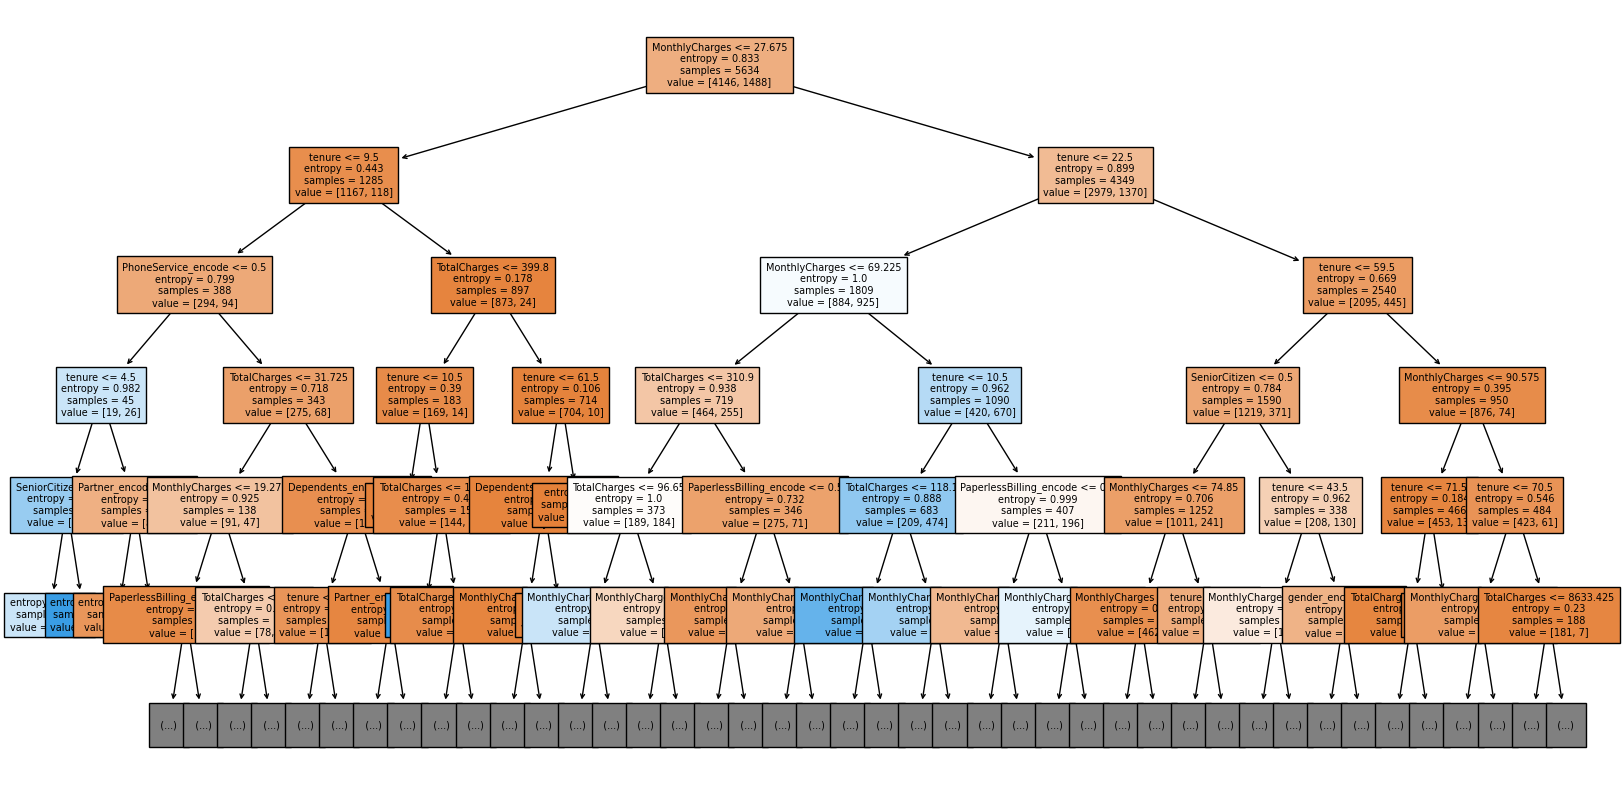

In [51]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(DT_model,
          feature_names=feature_names,
          max_depth=5,
          filled=True,
          fontsize=7)

In [52]:
# Visualizing trees by using export_text
from sklearn.tree import export_text

# export_text
export_text(DT_model,
            feature_names=feature_names,
            max_depth=5)

'|--- MonthlyCharges <= 27.68\n|   |--- tenure <= 9.50\n|   |   |--- PhoneService_encode <= 0.50\n|   |   |   |--- tenure <= 4.50\n|   |   |   |   |--- SeniorCitizen <= 0.50\n|   |   |   |   |   |--- class: Yes\n|   |   |   |   |--- SeniorCitizen >  0.50\n|   |   |   |   |   |--- class: Yes\n|   |   |   |--- tenure >  4.50\n|   |   |   |   |--- Partner_encode <= 0.50\n|   |   |   |   |   |--- class: No\n|   |   |   |   |--- Partner_encode >  0.50\n|   |   |   |   |   |--- class: No\n|   |   |--- PhoneService_encode >  0.50\n|   |   |   |--- TotalCharges <= 31.72\n|   |   |   |   |--- MonthlyCharges <= 19.27\n|   |   |   |   |   |--- PaperlessBilling_encode <= 0.50\n|   |   |   |   |   |   |--- truncated branch of depth 2\n|   |   |   |   |   |--- PaperlessBilling_encode >  0.50\n|   |   |   |   |   |   |--- class: No\n|   |   |   |   |--- MonthlyCharges >  19.27\n|   |   |   |   |   |--- TotalCharges <= 25.20\n|   |   |   |   |   |   |--- class: No\n|   |   |   |   |   |--- TotalCharge

### 3-2) Visualizing feature importances

In [53]:
# Extract feature importances
DT_model.feature_importances_

array([0.0267059 , 0.27736027, 0.35748482, 0.21994101, 0.02608274,
       0.02815181, 0.01985899, 0.01015346, 0.03426099])

<Axes: >

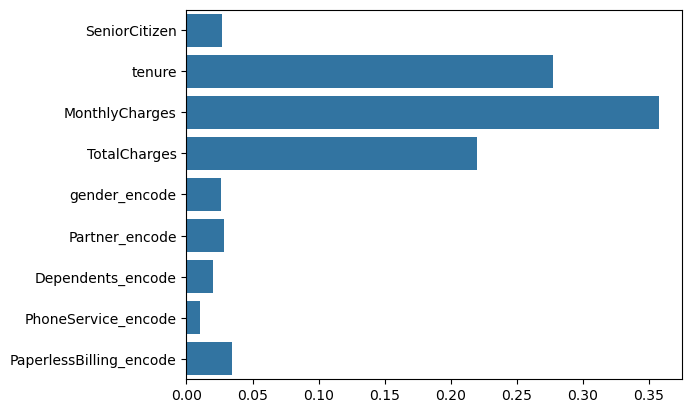

In [54]:
# Visualize feature importance
sns.barplot(x=DT_model.feature_importances_, y=feature_names)

### 3-3) Calculate the accuracy of the model 

In [55]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.7352732434350603